In [205]:
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import (LogLocator, NullLocator, 
                                NullFormatter, LogFormatterMathtext, 
                                ScalarFormatter, StrMethodFormatter)
import math
plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"]=14
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.transparent"] = False
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["axes.spines.right"]=False
plt.rcParams["axes.spines.top"]=False
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.1
plt.rcParams["axes.labelsize"] = 16

import seaborn as sns
import json

wharton_colors = json.load(open("wharton-colors-distinct.json", "r"))
wharton_pal = sns.color_palette(wharton_colors.values(), n_colors=len(wharton_colors))
sequential_wharton = sns.color_palette(
    f"blend:{wharton_colors['College Gray']},{wharton_colors['Wharton Blue']}",
    as_cmap=True
    )
# set matplotlib color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=wharton_pal)



import numpy as np
import pandas as pd
import os
import pickle

from permutation_helpers import random_data_gen

from scipy.stats import norm
def auc_from_maha(maha_dist: float):
    # source: https://en.wikipedia.org/wiki/Sensitivity_index#RMS_sd_discriminability_index
    auc = norm.cdf(maha_dist / np.sqrt(2))
    return auc

maha_values = np.linspace(0., 1.5, 5)

## 2D Mahalanobis distance

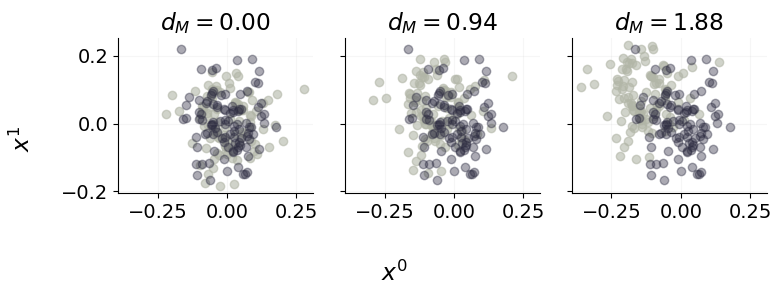

In [2]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3), sharey=True, sharex=True)
ax = ax.ravel()
for i, m in enumerate(np.linspace(0., 1.875, 3)):
    X, y = random_data_gen(n_samples=200, n_feats=2, maha=m, seed=56)
    ax[i].scatter(X[y, 0], X[y, 1], alpha=.6, color=wharton_pal[1])
    ax[i].scatter(X[~y, 0], X[~y, 1], alpha=.4, color=wharton_pal[4])
    ax[i].set_title(f"$d_M={m:.2f}$")
fig.supxlabel(r"$x^0$")
fig.supylabel(r"$x^1$")
plt.tight_layout()
plt.savefig("figures/2D_maha_viz.pdf", bbox_inches="tight")

# Power

In [225]:
metric = "log_loss"
testsize = pd.read_pickle(f"testsize_pval_{metric}.pkl")
samplesize = pd.read_pickle(f"samplesize_pval_{metric}.pkl")
nfeats = pd.read_pickle(f"nfeats_pval_{metric}.pkl")
ratio = pd.read_pickle(f"ratio_pval_{metric}.pkl")

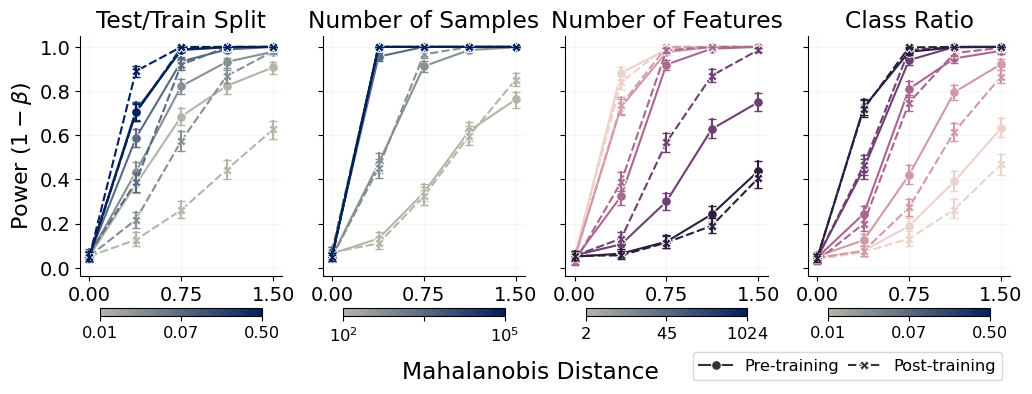

In [226]:
sequential_wharton = sns.color_palette(
    f"blend:{wharton_colors['College Gray']},{wharton_colors['Wharton Blue']}",
    as_cmap=True,
)

# subplots with shared y axis
fig, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True, sharex=True)
ax = ax.ravel()
# test/train split
sns.lineplot(
    data=testsize,
    x="d",
    y="positive",
    hue="param",
    hue_norm=LogNorm(),
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=7,
    err_style="bars",
    err_kws={"capsize": 3},
    palette=sequential_wharton,
    ax=ax[0],
)
ax[0].set_xticks(np.linspace(0, 1.5, 3))
mappable = plt.cm.ScalarMappable(cmap=sequential_wharton, norm=LogNorm())
mappable.set_array(testsize["param"].unique())
cbar = plt.colorbar(mappable, ax=ax[0], orientation="horizontal", shrink=0.8, pad=0.1)
minor_locator = NullLocator()
cbar.ax.xaxis.set_minor_locator(minor_locator)
ticks = np.logspace(
    np.log10(testsize["param"].min()), np.log10(testsize["param"].max()), num=3
)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize="small")
cbar.ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))

# major_formatter = LogFormatterMathtext(base=10, labelOnlyBase=False)
# cbar.ax.xaxis.set_major_formatter(major_formatter)
# use ticker

# number of samples
sns.lineplot(
    data=samplesize,
    x="d",
    y="positive",
    hue="param",
    hue_norm=LogNorm(),
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=7,
    err_style="bars",
    err_kws={"capsize": 3},
    palette=sequential_wharton,
    ax=ax[1],
)
mappable = plt.cm.ScalarMappable(cmap=sequential_wharton, norm=LogNorm())
mappable.set_array(samplesize["param"].unique())
cbar = plt.colorbar(mappable, ax=ax[1], orientation="horizontal", shrink=0.8, pad=0.1)
minor_locator = NullLocator()
cbar.ax.xaxis.set_minor_locator(minor_locator)
ticks = np.logspace(
    np.log10(samplesize["param"].min()), np.log10(samplesize["param"].max()), num=3
)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize="small")
# cbar.ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))

# number of features
sns.lineplot(
    data=nfeats,
    x="d",
    y="positive",
    hue="param",
    hue_norm=LogNorm(),
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=7,
    err_style="bars",
    err_kws={"capsize": 3},
    ax=ax[2],
)
mappable = plt.cm.ScalarMappable(cmap=sequential_wharton, norm=LogNorm())
mappable.set_array(nfeats["param"].unique())
cbar = plt.colorbar(mappable, ax=ax[2], orientation="horizontal", shrink=0.8, pad=0.1)
cbar.ax.xaxis.set_minor_locator(minor_locator)
ticks = np.logspace(
    np.log10(nfeats["param"].min()), np.log10(nfeats["param"].max()), num=3
)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize="small")
cbar.ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# class balance ratio
sns.lineplot(
    data=ratio,
    x="d",
    y="positive",
    hue="param",
    hue_norm=LogNorm(),
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=7,
    err_style="bars",
    err_kws={"capsize": 3},
    ax=ax[3],
)
mappable = plt.cm.ScalarMappable(cmap=sequential_wharton, norm=LogNorm())
mappable.set_array(ratio["param"].unique())
cbar = plt.colorbar(mappable, ax=ax[3], orientation="horizontal", shrink=0.8, pad=0.1)
minor_locator = NullLocator()
cbar.ax.xaxis.set_minor_locator(minor_locator)
ticks = np.logspace(
    np.log10(ratio["param"].min()), np.log10(ratio["param"].max()), num=3
)
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize="small")
cbar.ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))

# set titles and labels

titles = [
    "Test/Train Split",
    "Number of Samples",
    "Number of Features",
    "Class Ratio",
]
for i, title in enumerate(titles):
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(r"Power ($1-\beta$)")
    handles, labels = ax[i].get_legend_handles_labels()
    # put legend above the plot, use title
    # ax[i].legend(
    #     title=title,
    #     handles=handles[1:-3],
    #     labels=labels[1:-3],
    #     loc="lower center",
    #     bbox_to_anchor=(0.5, 1),
    #     # small font
    #     fontsize="x-small",
    #     ncols = 2,
    #     frameon=False,
    # )
    # remove legend from plot, set title
    ax[i].set_title(title)
    ax[i].get_legend().remove()
# plt.tight_layout()

sup_handles, sup_labels = ax[0].get_legend_handles_labels()
fig.legend(
    handles=sup_handles[-2:],
    labels=["Pre-training", "Post-training"],
    loc="lower right",
    bbox_to_anchor=(0.9, 0),
    ncols=2,
    fontsize="small",
    columnspacing=0.5,
)
# add a single x and y label
plt.subplots_adjust(wspace=0.2, bottom=0.08)
fig.supxlabel(r"Mahalanobis Distance")

# make sure top of the figure is not cut off
plt.savefig(f"figures/power-comparison-{metric}.pdf", bbox_inches="tight")

# Type I error

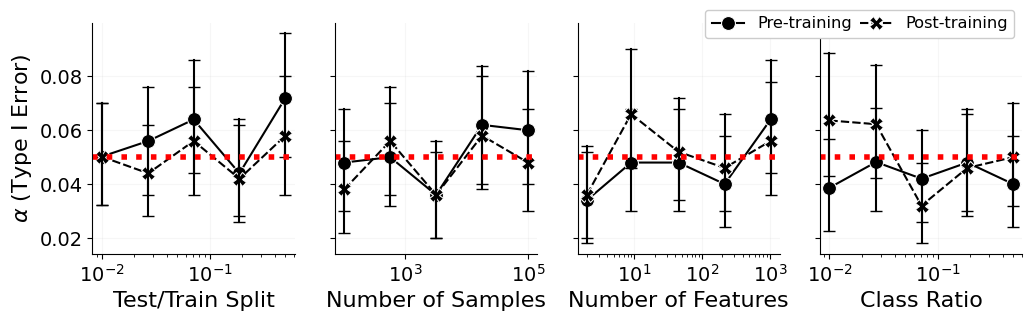

In [140]:
# Another joint plot, this time for type I error

# subplots with shared y axis
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True, sharex=False)
ax = ax.ravel()

# test/train split
sns.lineplot(
    data=testsize.query("d==0."),
    x="param",
    y="positive",
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=10,
    color="k",
    err_style="bars",
    err_kws={"capsize": 4},
    ax=ax[0],
)

# number of samples
sns.lineplot(
    data=samplesize.query("d==0."),
    x="param",
    y="positive",
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=10,
    color="k",
    err_style="bars",
    err_kws={"capsize": 4},
    ax=ax[1],
)

# number of features
sns.lineplot(
    data=nfeats.query("d==0."),
    x="param",
    y="positive",
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=10,
    color="k",
    err_style="bars",
    err_kws={"capsize": 4},
    ax=ax[2],
)

# class balance ratio
sns.lineplot(
    data=ratio.query("d==0."),
    x="param",
    y="positive",
    style="test",
    markers=True,
    markersize=10,
    color="k",
    err_style="bars",
    err_kws={"capsize": 4},
    ax=ax[3],
)

# set titles and labels
titles = [
    "Test/Train Split",
    "Number of Samples",
    "Number of Features",
    "Class Ratio",
]
for i, title in enumerate(titles):
    ax[i].set_xlabel(title)
    ax[i].set_ylabel(r"$\alpha$ (Type I Error)")
    # ax[i].set_title(title)
    ax[i].get_legend().remove()

    # plot nominal alpha
    ax[i].axhline(0.05, color="red", ls=":", lw=4)
    ax[i].set_xscale("log")

sup_handles, sup_labels = ax[0].get_legend_handles_labels()
fig.legend(
    handles=sup_handles,
    labels=["Pre-training", "Post-training"],
    loc="upper right",
    bbox_to_anchor=(0.9, .95),
    ncols=2,
    fontsize="small",
    columnspacing=0.5,
    framealpha=1,
)

# save figure
plt.savefig(f"figures/typeI-error-comparison-{metric}.pdf")

# Runtime analysis

In [197]:
runtime = pd.read_pickle("simulate_runtime.pkl").reset_index()

In [219]:
runtime.groupby(["param", "test"]).agg({"value":["mean", "sem"]})

value          
                   mean       sem
param  test                      
100    post   13.406740  0.074810
       pre    21.759653  0.091838
562    post   13.989330  0.074285
       pre    22.017802  0.102866
3162   post   27.181643  0.304607
       pre    27.898036  0.125202
17782  post   32.420920  0.338479
       pre    70.516954  0.295482
100000 post   58.087913  0.279157
       pre   303.976461  1.518004

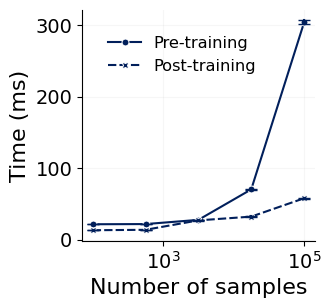

In [222]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
ax = sns.lineplot(
    data=runtime,
    x="param",
    y="value",
    style="test",
    markers=True,
    markersize=5,
    ci=95,
    # color=wharton_colors["Wharton Blue"],
    err_style="bars",
    err_kws={"capsize": 4}
)
ax.set_xlabel("Number of samples")
ax.set_ylabel("Time (ms)")
plt.xscale("log")
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    title="",
    handles=handles,
    labels=["Pre-training", "Post-training"],
    loc="upper left",
    bbox_to_anchor=(0.05, 0.95),
    fontsize="small",
    frameon=False,
)
# plt.yscale("log")
plt.savefig("figures/runtime.pdf")

# Are we over-fitting or under-fitting?

In [22]:
maha = nfeats.query("param==100")
expected_auc = auc_from_maha(np.unique(maha["d"]))

In [24]:
ax = sns.pointplot(data=maha, x="d", y="roc_auc_score", hue='test', label="Actual AUC")
ax.plot(expected_auc, color='red', ls='--', marker='o', label = "Expected AUC")
ax.set_xlabel("Mahalanobis distance")
ax.set_ylabel("AUC")
plt.grid(True, alpha=0.1)
# plt.legend()
# sns.pointplot(data=null_scores, x="param", y="mean")

ValueError: Could not interpret value `roc_auc_score` for `y`. An entry with this name does not appear in `data`.

## Other

<Axes: xlabel='brier_score', ylabel='Count'>

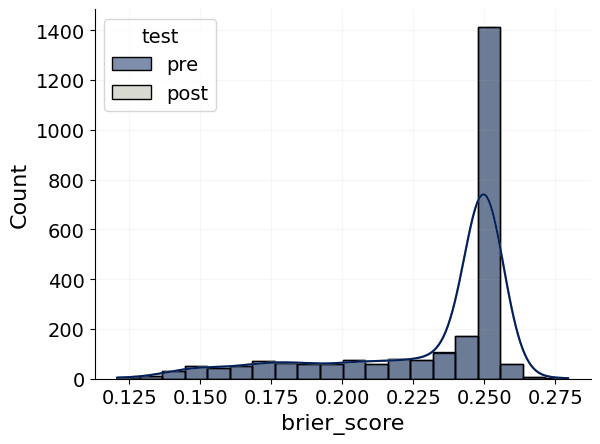

In [154]:
sns.histplot(ratio.query("param==0.5"), x="brier_score", hue="test", hue_order=["pre", "post"],kde=True, bins=20)

<Axes: xlabel='brier_score', ylabel='Count'>

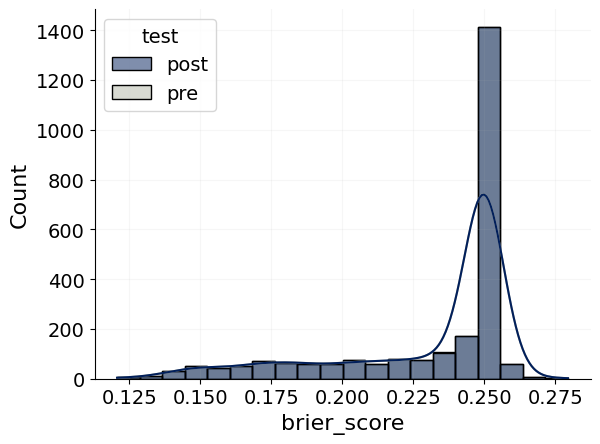

In [152]:
sns.histplot(ratio.query("param==0.5"), x="brier_score", hue="test", hue_order=["post", "pre"],kde=True, bins=20)

In [157]:
ratio.query("param==0.5").groupby(["d", "test"]).mean()

param  simno  brier_score      pval  positive
d    test                                               
0.00 post    0.5  249.5     0.251491  0.506006     0.040
     pre     0.5  249.5     0.251483  0.504667     0.050
0.38 post    0.5  249.5     0.247179  0.937874     0.000
     pre     0.5  249.5     0.247179  0.903942     0.012
0.75 post    0.5  249.5     0.235396  0.999634     0.000
     pre     0.5  249.5     0.235428  0.993816     0.002
1.12 post    0.5  249.5     0.219558  1.000000     0.000
     pre     0.5  249.5     0.219473  0.999535     0.000
1.50 post    0.5  249.5     0.201376  1.000000     0.000
     pre     0.5  249.5     0.201545  1.000000     0.000

In [158]:
ratio_full = pd.read_pickle("ratio.pkl")

In [159]:
ratio_full

,simno,roc_auc,accuracy,log_loss,brier_score,null_roc_auc,null_accuracy,null_log_loss,null_brier_score,test,d,param
0,0,0.859296,0.770,0.691867,0.24936,0.763819,0.725,0.692311,0.249582,pre,0.0,0.01
1,0,0.859296,0.770,0.691867,0.24936,0.969849,0.675,0.692550,0.249701,pre,0.0,0.01
2,0,0.859296,0.770,0.691867,0.24936,0.050251,0.725,0.692606,0.249729,pre,0.0,0.01
3,0,0.859296,0.770,0.691867,0.24936,0.924623,0.725,0.692476,0.249664,pre,0.0,0.01
4,0,0.859296,0.770,0.691867,0.24936,0.150754,0.670,0.692700,0.249777,pre,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
121899995,499,0.842020,0.775,0.508059,0.16270,0.504848,0.485,1.019344,0.343751,post,1.5,0.50
121899996,499,0.842020,0.775,0.508059,0.16270,0.556566,0.555,0.975043,0.313599,post,1.5,0.50
121899997,499,0.842020,0.775,0.508059,0.16270,0.563434,0.535,0.939782,0.310631,post,1.5,0.50
121899998,499,0.842020,0.775,0.508059,0.16270,0.505758,0.515,1.049410,0.344430,post,1.5,0.50


In [160]:
from permutation_helpers import score_model

In [164]:
y_pred = np.random.uniform(0, 1, 10) + np.random.normal(0, 0.1, 10)
y_true = np.random.choice([0, 1], 10)


In [167]:
score_model(y_true, y_pred)

{'roc_auc': 0.375,
 'accuracy': 0.5,
 'log_loss': 1.0410469004986957,
 'brier_score': 0.3332273987837525}

In [196]:
from copy import deepcopy
just_off = deepcopy(y_true)
just_off[0:1] = np.ones(1)
score_model(y_true=y_true, y_pred=just_off)

{'roc_auc': 0.875,
 'accuracy': 0.9,
 'log_loss': 3.604365338911715,
 'brier_score': 0.1}